In [37]:
from sklearn import cluster, datasets,metrics
import pandas as pd
import matplotlib.pyplot as plt
zoo = pd.read_csv("zoo.csv") 

In [32]:
zoo_SP = zoo[['hair','feathers','eggs','milk','airborne',
              'aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail',
              'domestic','catsize','type']]

In [33]:
zoo_SP_hierarchical = cluster.AgglomerativeClustering(linkage = 'ward', 
                                                      affinity = 'euclidean', n_clusters = 7)
zoo_SP_hierarchical.fit(zoo_SP)
cluster_labels = zoo_SP_hierarchical.labels_
silhouette_avg = metrics.silhouette_score(zoo_SP, cluster_labels)
print(silhouette_avg)

0.5343312829061678


In [39]:
zoo_X=zoo.values
zoo_X[:,1:]

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]], dtype=object)

In [41]:
zoo_X_hierarchical = cluster.AgglomerativeClustering(linkage = 'ward', 
                                                      affinity = 'euclidean', n_clusters = 7)
zoo_X_hierarchical.fit(zoo_X)
cluster_labels = zoo_X_hierarchical.labels_
silhouette_avg = metrics.silhouette_score(zoo_X, cluster_labels)
print(silhouette_avg)

ValueError: could not convert string to float: 'aardvark'

In [16]:
plt.figure(figsize=(10, 7))  
plt.scatter(zoo_SP[:,0], zoo_SP[:,1], c=cluster_labels, cmap='rainbow')  

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x504 with 0 Axes>

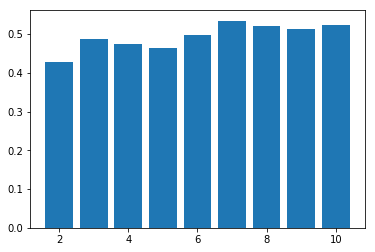

[0.4289403306361852, 0.4859605580738275, 0.4745243185542208, 0.4644012371179964, 0.4961856301151036, 0.5343312829061678, 0.520470989747133, 0.5125633299672865, 0.5245256673436559]


In [9]:
import matplotlib.pyplot as plt

silhouette_avgs=[]

ks = range(2, 11)
for k in ks:
    zoo_SP_hierarchical = cluster.AgglomerativeClustering(n_clusters = k).fit(zoo_SP)
    cluster_labels = zoo_SP_hierarchical.labels_
    silhouette_avg = metrics.silhouette_score(zoo_SP, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)